In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)

microbes = ["Bif", "Lactobacilli", "Strep", "Staph", "Colostridium", "Enterococcus", "Bacteroides"]
samples = [f"Sample{i}" for i in range(1, 21)]

# FIXED: broadcast lam correctly
data = np.random.poisson(lam=np.array([120, 70, 60, 30, 20, 10, 5])[:, None], size=(7, 20))

df_count = pd.DataFrame(data, index=microbes, columns=samples)

df_count.to_csv("microbial_counts.csv")



In [3]:
%load_ext autoreload
%autoreload 2

from Microbial_Abundance_Lesson import run_microbiome_pipeline, classify_new_sample


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



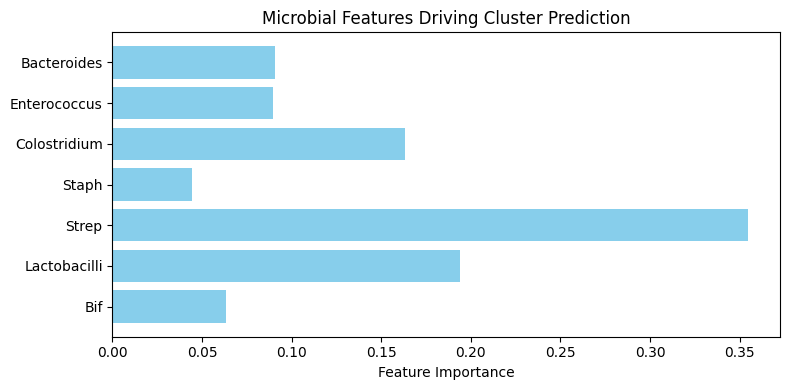

In [4]:
results = run_microbiome_pipeline(df_count)

In [5]:
import pandas as pd

new_sample = pd.DataFrame({
    "New Sample": [100, 70, 25, 10, 5, 0, 0]  # You can assign real values later
}, index=["Bif", "Lactobacilli", "Strep", "Staph", "Colostridium", "Enterococcus", "Bacteroides"])


cluster, label = classify_new_sample(new_sample, results["model"])
print(f"Cluster: {cluster} ({label})")



Cluster: 1 (Dysbiotic-like)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



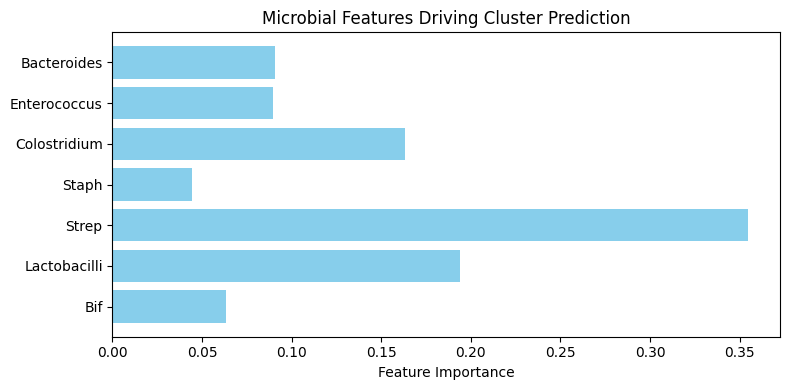

In [6]:
from Microbial_Abundance_Lesson import run_microbiome_pipeline
results = run_microbiome_pipeline(df_count)

results["clustered_data"].to_csv("clustered_predictions.csv")
new_sample["Predicted Label"] = label
new_sample.to_csv("new_sample_classification.csv")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



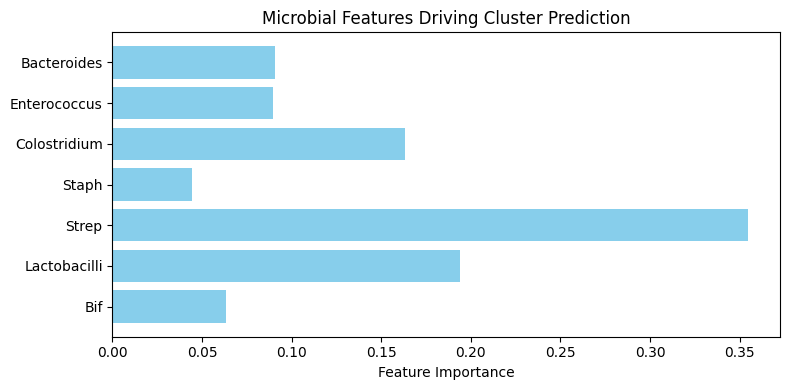

,Cluster,Cluster Label
NewSample1,1,Dysbiotic-like
NewSample2,1,Dysbiotic-like
NewSample3,1,Dysbiotic-like
NewSample4,1,Dysbiotic-like
NewSample5,1,Dysbiotic-like


In [9]:

from Microbial_Abundance_Lesson import run_microbiome_pipeline, classify_batch
df_count = pd.read_csv("microbial_counts.csv", index_col=0)
results = run_microbiome_pipeline(df_count)
import numpy as np

np.random.seed(101)
df_new_samples = pd.DataFrame({
    f"NewSample{i}": np.random.poisson(lam=[100, 70, 50, 25, 15, 10, 5])
    for i in range(1, 6)
}, index=["Bif", "Lactobacilli", "Strep", "Staph", "Colostridium", "Enterococcus", "Bacteroides"])
batch_results = classify_batch(df_new_samples, results["model"])
batch_results


In [10]:
batch_results.to_csv("batch_classification_results.csv")


In [11]:
batch_results["Cluster Label"].value_counts()


Cluster Label
Dysbiotic-like    5
Name: count, dtype: int64

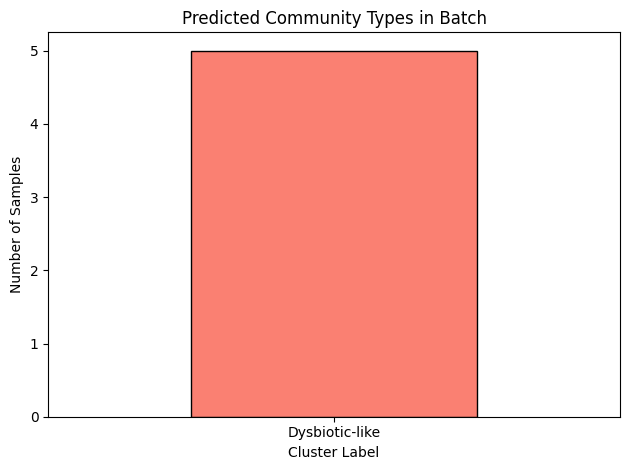

In [12]:
import matplotlib.pyplot as plt

batch_results["Cluster Label"].value_counts().plot(
    kind="bar", color="salmon", edgecolor="black"
)

plt.title("Predicted Community Types in Batch")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


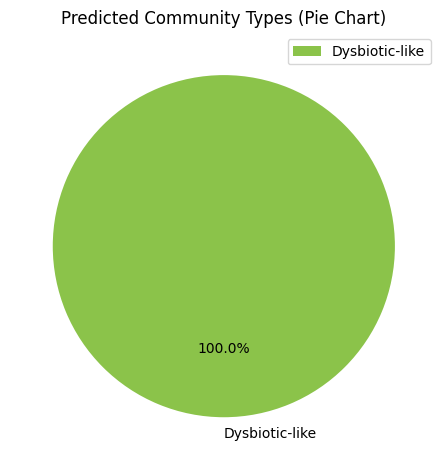

In [15]:
batch_results["Cluster Label"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=["#8BC34A", "#FF7043"],
    ylabel="",
    legend=True
)

plt.title("Predicted Community Types (Pie Chart)")
plt.tight_layout()
plt.savefig("cluster_predictions_pie.png", dpi=300)
plt.show()


In [16]:
import joblib

joblib.dump(results["model"], "trained_microbiome_model.joblib")


['trained_microbiome_model.joblib']

In [17]:
loaded_model = joblib.load("trained_microbiome_model.joblib")


In [20]:
new_sample_clean = new_sample.drop(columns=["Predicted Label"], errors="ignore")
new_sample_clean = new_sample_clean.apply(pd.to_numeric)
cluster, label = classify_new_sample(new_sample_clean, loaded_model)
print(f"Cluster: {cluster} ({label})")



Cluster: 1 (Dysbiotic-like)


In [1]:
from Microbial_Abundance_Lesson import classify_new_sample
